In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)
    
road = cv2.imread('C:/Users/John Lang/Desktop/ComputerVision/DATA/road_image.jpg')

In [2]:
road_copy = np.copy(road)

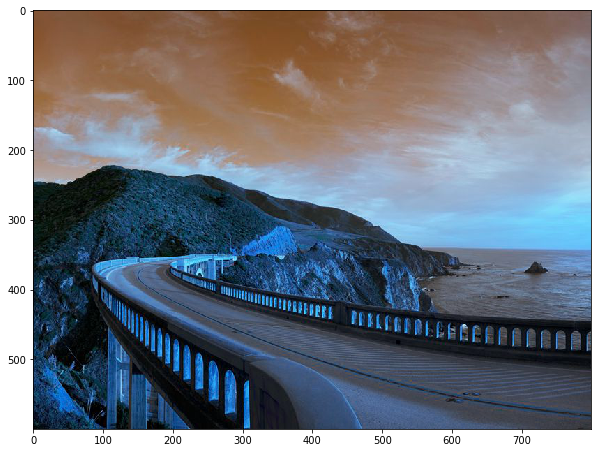

In [3]:
display(road)

In [4]:
road.shape

(600, 800, 3)

In [5]:
marker_image = np.zeros(road.shape[:2],dtype=np.int32)

In [6]:
segments = np.zeros(road.shape,dtype=np.uint8)

In [7]:
from matplotlib import cm

In [8]:
cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [10]:
# scale to 255
def create_rgb(i):
    return tuple(np.array(cm.tab10(0)[:3])*255)

In [12]:
colors = []
for i in range(10):
    colors.append(create_rgb(i))

In [23]:
###
#Global Variables
n_markers = 10
current_marker = 1
# marks updated by watershed
marks_updated = False

# Callback function
def mouse_callback(event, x, y, flags, param):
    global marks_updated
    
    if event == cv2.EVENT_LBUTTONDOWN:
        # Markers passed to the watershed algo
        cv2.circle(marker_image,(x,y),10,(current_marker),-1)

        # what the user sees
        cv2.circle(road_copy,(x,y),10,colors[current_marker], -1)
        
        marks_updated = True
#While True
cv2.namedWindow('Road Iamge')
cv2.setMouseCallback('Road Image', mouse_callback)

while True:
    cv2.imshow('Watershed Segments', segments)
    cv2.imshow('Road Image', road_copy)
    
    #close windows
    k = cv2.waitKey(1)
    
    if k == 27:
        break
    
    #clear all colors - pressing c key
    elif k == ord('c'):
        road_copy = road.copy()
        marker_img = np.zeros(road.shape[:2],dtype=np.int32)
        segments = np.zeros(road.shape, dtype=np.uint8)
    
    #update color choice
    elif k > 0 and chr(k).isdigit():
        current_marker = int(chr(k))
        
    #update marks
    if marks_updated:
        marker_image_copy = marker_image.copy()
        cv2.watershed(road,marker_image_copy)
        
        segments = np.zeros(road.shape, dtype=np.uint8)
        
        for color_ind in range(n_markers):
            segments[marker_image_copy==(color_ing)] = colors[color_ind]
            
cv2.destroyAllWindows()

In [19]:
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)

while True:
    
    # SHow the 2 windows
    cv2.imshow('WaterShed Segments', segments)
    cv2.imshow('Road Image', road_copy)
        
        
    # Close everything if Esc is pressed
    k = cv2.waitKey(1)

    if k == 27:
        break
        
    # Clear all colors and start over if 'c' is pressed
    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[0:2], dtype=np.int32)
        segments = np.zeros(road.shape,dtype=np.uint8)
        
    # If a number 0-9 is chosen index the color
    elif k > 0 and chr(k).isdigit():
        # chr converts to printable digit
        
        current_marker  = int(chr(k))
        
        # CODE TO CHECK INCASE USER IS CARELESS
#         n = int(chr(k))
#         if 1 <= n <= n_markers:
#             current_marker = n
    
    # If we clicked somewhere, call the watershed algorithm on our chosen markers
    if marks_updated:
        
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)
        
        segments = np.zeros(road.shape,dtype=np.uint8)
        
        for color_ind in range(n_markers):
            segments[marker_image_copy == (color_ind)] = colors[color_ind]
        
        marks_updated = False
        
cv2.destroyAllWindows()